# Forecasting Electricity Consumption Trends with CNN

This example uses the CNN model to forecast electricity consumption using data from gov.ie. The time series ranges from 29th March 2011 to 17th February 2013.

#### Attributions

The below code uses the template from the [Intro to TensorFlow for Deep Learning](https://www.udacity.com/course/intro-to-tensorflow-for-deep-learning--ud187) tutorial, of which the original authors **(Copyright 2018 The TensorFlow Authors)** have made available under the Apache 2.0 license.

Modifications have been made to the below code for the purpose of generating appropriate analyses on the electricity consumption time series. The original source code can be found [here](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l08c09_forecasting_with_cnn.ipynb#scrollTo=PgYwn9VM8OJi).

The dataset used in this example is sourced from [data.gov.ie](https://data.gov.ie/dataset/energy-consumption-gas-and-electricity-civic-offices-2009-2012/resource/6091c604-8c94-4b44-ac52-c1694e83d746).

The below work and findings are not endorsed by the original authors in any way.

#### Apache 2.0 Licence

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
tf.random.set_seed(1234)

keras = tf.keras

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as ts

# fix random seed for reproducibility
np.random.seed(7)

# load dataset
df = pd.read_csv('dccelectricitycivicsblocks34p20130221-1840.csv', engine='python', skipfooter=3)
df

,Civic Offices Blocks 3 and 4 KWh,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,13/02/2013,96,25,25,25.5,24.5,25,26,25.5,25.5,...,33,32.5,30.5,27.5,26,26,26,26,25.5,26.5
689,14/02/2013,96,26,25.5,26,25.5,25,27,25.5,26.5,...,31,30,30.5,29,28,26.5,25.5,25,25.5,25
690,15/02/2013,96,25.5,24.5,25.5,24.5,25,26.5,25,25.5,...,29,27,28,28,25.5,26,25.5,25.5,24.5,25
691,16/02/2013,96,25,25,24.5,24.5,24.5,26.5,25,25.5,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24


In [4]:
df2=df.rename(columns=df.iloc[0])
df3=df2.drop(df.index[0])
df3
df3.drop(df3.index[0])
df4=df3.drop('Date', axis=1)
df5=df4.drop('Values', axis=1)
df5
df6=df5.dropna()
df7=df6.values
df7
ts=np.sum(df7, axis=1, dtype=float)
ts

array([4981.5001927 , 5166.60016445, 3046.35014537, 3101.10013769,
       4908.60016439, 4858.50017742, 4905.00019836, 4999.95019526,
       3075.90013122, 3023.5501442 , 5004.6001587 , 5199.30019957,
       5226.75017163, 5162.55022428, 4991.55017468, 2950.20010378,
       4883.85017776, 5055.15017129, 5084.10021592, 4914.00019451,
       3581.55014991, 2981.55008892, 2967.00011064, 3515.70014566,
       4721.10016438, 4931.85019494, 5020.05018234, 4799.40017322,
       3043.20012856, 2929.05012318, 3423.45014192, 4949.55017475,
       5155.05015188, 5238.75021174, 5129.10016059, 3088.95013995,
       3017.40010454, 5041.95018196, 5170.80017096, 5250.90023994,
       5239.35021975, 5163.60019308, 3169.65013694, 3034.65012932,
       5056.05021094, 5052.6001988 , 5048.2501869 , 4971.75019264,
       3013.20013239, 2919.45011703, 4830.0002022 , 5007.90018087,
       5028.00018885, 5088.60017207, 5092.35015869, 3069.90011787,
       2909.85011099, 4923.60022544, 5136.75021744, 5233.65021

In [5]:
from numpy.random import seed
seed(1)
from pandas import DataFrame

In [6]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)


def trend(time, slope=0):
    return slope * time
  
  
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

  
def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)
  
  
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level
  

def seq2seq_window_dataset(series, window_size, batch_size=32,
                           shuffle_buffer=1000):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
  

def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

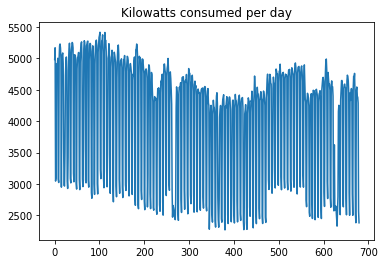

In [7]:
series = ts
series=np.array(series)
plt.plot(series)
plt.title("Kilowatts consumed per day")
plt.show()

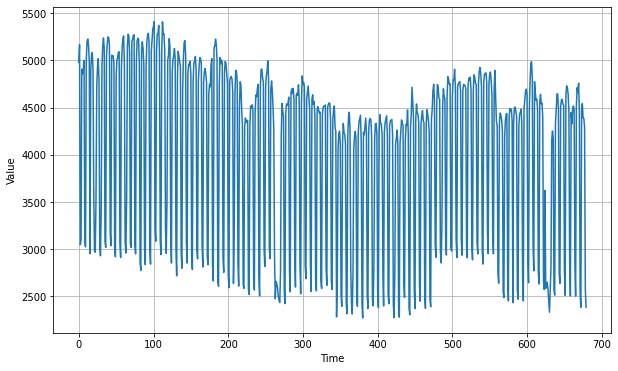

In [8]:
time = np.arange(0, 680)
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [9]:
split_time = 544
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

## Preprocessing With 1D-Convolutional Layers

In [10]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=32)
train_set

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>

In [11]:
model = keras.models.Sequential([
  keras.layers.Conv1D(filters=32, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 4207.7271 - mae: 4208.2271 - lr: 1.0000e-08
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 4205.3975 - mae: 4205.8965 - lr: 1.1220e-08
Epoch 3/100
17/17 [==============================] - 0s 8ms/step - loss: 4200.7129 - mae: 4201.2129 - lr: 1.2589e-08
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 4198.0894 - mae: 4198.5889 - lr: 1.4125e-08
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 4195.2607 - mae: 4195.7603 - lr: 1.5849e-08
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 4189.2979 - mae: 4189.7988 - lr: 1.7783e-08
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 4188.2119 - mae: 4188.7114 - lr: 1.9953e-08
Epoch 8/100
17/17 [==============================] - 0s 8ms/step - loss: 4187.1392 - mae: 4187.6387 - lr: 2.2387e-08
Epoch 9/100
17/17 [==============================] - 0s 8ms/step

17/17 [==============================] - 0s 7ms/step - loss: 775.4073 - mae: 775.9070 - lr: 2.8184e-05
Epoch 71/100
17/17 [==============================] - 0s 8ms/step - loss: 775.9116 - mae: 776.4114 - lr: 3.1623e-05
Epoch 72/100
17/17 [==============================] - 0s 8ms/step - loss: 776.1539 - mae: 776.6537 - lr: 3.5481e-05
Epoch 73/100
17/17 [==============================] - 0s 7ms/step - loss: 775.4449 - mae: 775.9448 - lr: 3.9811e-05
Epoch 74/100
17/17 [==============================] - 0s 7ms/step - loss: 776.3077 - mae: 776.8076 - lr: 4.4668e-05
Epoch 75/100
17/17 [==============================] - 0s 8ms/step - loss: 775.6523 - mae: 776.1519 - lr: 5.0119e-05
Epoch 76/100
17/17 [==============================] - 0s 7ms/step - loss: 775.6309 - mae: 776.1307 - lr: 5.6234e-05
Epoch 77/100
17/17 [==============================] - 0s 7ms/step - loss: 775.7930 - mae: 776.2929 - lr: 6.3096e-05
Epoch 78/100
17/17 [==============================] - 0s 7ms/step - loss: 775.4609 - 

In [13]:
model = keras.models.load_model("my_checkpoint.h5")

In [14]:
rnn_forecast = model_forecast(model, series[:,  np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

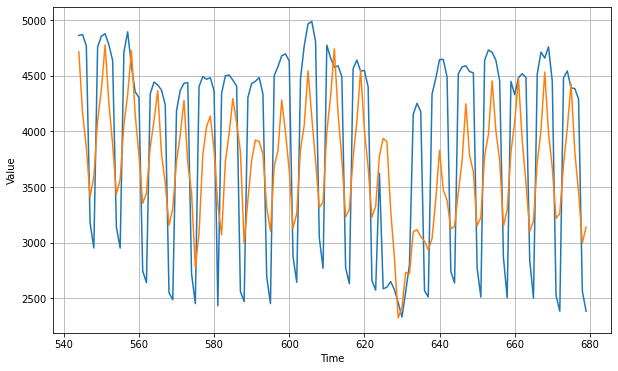

In [15]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [16]:
keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

605.09937

In [17]:
np.mean(x_valid)

3905.8786764705883

## Fully Convolutional Forecasting

In [18]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 64
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=128)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
optimizer = keras.optimizers.Adam(lr=3e-4)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h6", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
history = model.fit(train_set, epochs=500,
                    validation_data=valid_set,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
      4/Unknown - 0s 13ms/step - loss: 3929.0825 - mae: 3929.5825WARNING:tensorflow:From /home/michael/.local/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_checkpoint.h6/assets
4/4 [==============================] - 2s 387ms/step - loss: 3929.0825 - mae: 3929.5825 - val_loss: 3675.9900 - val_mae: 3676.4900
Epoch 2/500
4/4 [==============================] - 1s 336ms/step - loss: 3847.9287 - mae: 3848.4287 - val_loss: 3587.9299 - val_mae: 3588.4299
Epoch 3/500
4/4 [==============================] - 1s 321ms/step - loss: 3749.0938 - mae: 3749.5938 - val_loss: 3481.4045 - val_mae: 3481.9045
Epoch 4/500
4/4 [==============================] - 1s 325ms/step - loss: 3630.00

Epoch 29/500
4/4 [==============================] - 1s 310ms/step - loss: 854.9742 - mae: 855.4740 - val_loss: 881.1294 - val_mae: 881.6293
Epoch 30/500
4/4 [==============================] - 1s 329ms/step - loss: 813.0879 - mae: 813.5878 - val_loss: 850.3548 - val_mae: 850.8548
Epoch 31/500
4/4 [==============================] - 1s 375ms/step - loss: 779.5023 - mae: 780.0022 - val_loss: 823.9558 - val_mae: 824.4557
Epoch 32/500
4/4 [==============================] - 1s 295ms/step - loss: 749.2560 - mae: 749.7558 - val_loss: 797.2614 - val_mae: 797.7612
Epoch 33/500
4/4 [==============================] - 1s 353ms/step - loss: 719.3591 - mae: 719.8590 - val_loss: 771.1816 - val_mae: 771.6815
Epoch 34/500
4/4 [==============================] - 1s 333ms/step - loss: 690.7306 - mae: 691.2305 - val_loss: 743.5564 - val_mae: 744.0563
Epoch 35/500
4/4 [==============================] - 1s 275ms/step - loss: 662.9227 - mae: 663.4225 - val_loss: 716.3896 - val_mae: 716.8894
Epoch 36/500
4/4 [==

4/4 [==============================] - 1s 317ms/step - loss: 318.0840 - mae: 318.5834 - val_loss: 389.9699 - val_mae: 390.4694
Epoch 59/500
4/4 [==============================] - 1s 268ms/step - loss: 314.4496 - mae: 314.9489 - val_loss: 386.1197 - val_mae: 386.6190
Epoch 60/500
4/4 [==============================] - 1s 305ms/step - loss: 310.8902 - mae: 311.3896 - val_loss: 382.1731 - val_mae: 382.6727
Epoch 61/500
4/4 [==============================] - 1s 271ms/step - loss: 307.1308 - mae: 307.6300 - val_loss: 378.9346 - val_mae: 379.4341
Epoch 62/500
4/4 [==============================] - 1s 262ms/step - loss: 303.8615 - mae: 304.3608 - val_loss: 376.8247 - val_mae: 377.3244
Epoch 63/500
4/4 [==============================] - 1s 319ms/step - loss: 300.2690 - mae: 300.7681 - val_loss: 373.6235 - val_mae: 374.1232
Epoch 64/500
4/4 [==============================] - 1s 266ms/step - loss: 297.1402 - mae: 297.6395 - val_loss: 371.1659 - val_mae: 371.6653
Epoch 65/500
4/4 [===============

4/4 [==============================] - 1s 313ms/step - loss: 257.2682 - mae: 257.7671 - val_loss: 324.0737 - val_mae: 324.5730
Epoch 89/500
4/4 [==============================] - 1s 267ms/step - loss: 254.8388 - mae: 255.3378 - val_loss: 322.1940 - val_mae: 322.6931
Epoch 90/500
4/4 [==============================] - 1s 263ms/step - loss: 254.5908 - mae: 255.0900 - val_loss: 321.2519 - val_mae: 321.7510
Epoch 91/500
4/4 [==============================] - 1s 319ms/step - loss: 253.1731 - mae: 253.6721 - val_loss: 319.9618 - val_mae: 320.4611
Epoch 92/500
4/4 [==============================] - 1s 265ms/step - loss: 251.6894 - mae: 252.1886 - val_loss: 318.4987 - val_mae: 318.9977
Epoch 93/500
4/4 [==============================] - 1s 274ms/step - loss: 250.3369 - mae: 250.8359 - val_loss: 317.2174 - val_mae: 317.7166
Epoch 94/500
4/4 [==============================] - 2s 386ms/step - loss: 249.1052 - mae: 249.6040 - val_loss: 316.4997 - val_mae: 316.9988
Epoch 95/500
4/4 [===============

4/4 [==============================] - 1s 365ms/step - loss: 228.9277 - mae: 229.4268 - val_loss: 291.8000 - val_mae: 292.2992
Epoch 119/500
4/4 [==============================] - 1s 300ms/step - loss: 228.3259 - mae: 228.8248 - val_loss: 291.3060 - val_mae: 291.8053
Epoch 120/500
4/4 [==============================] - 1s 304ms/step - loss: 228.0347 - mae: 228.5337 - val_loss: 290.3327 - val_mae: 290.8320
Epoch 121/500
4/4 [==============================] - 2s 387ms/step - loss: 226.9326 - mae: 227.4314 - val_loss: 289.7657 - val_mae: 290.2648
Epoch 122/500
4/4 [==============================] - 1s 292ms/step - loss: 226.3142 - mae: 226.8131 - val_loss: 288.4932 - val_mae: 288.9924
Epoch 123/500
4/4 [==============================] - 1s 309ms/step - loss: 225.8992 - mae: 226.3980 - val_loss: 287.8170 - val_mae: 288.3163
Epoch 124/500
4/4 [==============================] - 1s 356ms/step - loss: 225.1668 - mae: 225.6656 - val_loss: 286.8640 - val_mae: 287.3631
Epoch 125/500
4/4 [========

Epoch 151/500
4/4 [==============================] - 0s 20ms/step - loss: 209.3051 - mae: 209.8039 - val_loss: 270.9650 - val_mae: 271.4644
Epoch 152/500
4/4 [==============================] - 0s 18ms/step - loss: 209.0869 - mae: 209.5857 - val_loss: 271.3663 - val_mae: 271.8652
Epoch 153/500
4/4 [==============================] - 0s 19ms/step - loss: 208.2192 - mae: 208.7181 - val_loss: 270.1303 - val_mae: 270.6296
Epoch 154/500
4/4 [==============================] - 1s 314ms/step - loss: 206.8989 - mae: 207.3979 - val_loss: 268.0528 - val_mae: 268.5522
Epoch 155/500
4/4 [==============================] - 0s 19ms/step - loss: 205.6131 - mae: 206.1117 - val_loss: 268.9931 - val_mae: 269.4924
Epoch 156/500
4/4 [==============================] - 1s 271ms/step - loss: 205.5725 - mae: 206.0714 - val_loss: 266.6165 - val_mae: 267.1154
Epoch 157/500
4/4 [==============================] - 1s 264ms/step - loss: 204.4736 - mae: 204.9725 - val_loss: 265.8919 - val_mae: 266.3911
Epoch 158/500
4/4

4/4 [==============================] - 1s 273ms/step - loss: 187.2477 - mae: 187.7462 - val_loss: 251.4620 - val_mae: 251.9612
Epoch 187/500
4/4 [==============================] - 1s 318ms/step - loss: 186.8080 - mae: 187.3066 - val_loss: 251.2791 - val_mae: 251.7777
Epoch 188/500
4/4 [==============================] - 0s 19ms/step - loss: 186.6648 - mae: 187.1634 - val_loss: 252.1770 - val_mae: 252.6756
Epoch 189/500
4/4 [==============================] - 1s 269ms/step - loss: 186.0769 - mae: 186.5758 - val_loss: 249.3911 - val_mae: 249.8896
Epoch 190/500
4/4 [==============================] - 1s 264ms/step - loss: 185.8207 - mae: 186.3193 - val_loss: 248.7522 - val_mae: 249.2515
Epoch 191/500
4/4 [==============================] - 1s 330ms/step - loss: 184.5005 - mae: 184.9993 - val_loss: 248.0764 - val_mae: 248.5754
Epoch 192/500
4/4 [==============================] - 1s 274ms/step - loss: 183.6575 - mae: 184.1562 - val_loss: 247.7513 - val_mae: 248.2497
Epoch 193/500
4/4 [=========

Epoch 225/500
4/4 [==============================] - 1s 271ms/step - loss: 171.9590 - mae: 172.4575 - val_loss: 237.4836 - val_mae: 237.9819
Epoch 226/500
4/4 [==============================] - 0s 19ms/step - loss: 171.6726 - mae: 172.1711 - val_loss: 239.8173 - val_mae: 240.3165
Epoch 227/500
4/4 [==============================] - 1s 269ms/step - loss: 171.7551 - mae: 172.2536 - val_loss: 237.0018 - val_mae: 237.5006
Epoch 228/500
4/4 [==============================] - 1s 320ms/step - loss: 171.8673 - mae: 172.3658 - val_loss: 236.8947 - val_mae: 237.3937
Epoch 229/500
4/4 [==============================] - 0s 19ms/step - loss: 171.9987 - mae: 172.4973 - val_loss: 241.6400 - val_mae: 242.1391
Epoch 230/500
4/4 [==============================] - 0s 19ms/step - loss: 172.4659 - mae: 172.9643 - val_loss: 237.8598 - val_mae: 238.3587
Epoch 231/500
4/4 [==============================] - 1s 264ms/step - loss: 171.6554 - mae: 172.1539 - val_loss: 236.5741 - val_mae: 237.0729
Epoch 232/500
4/

4/4 [==============================] - 0s 20ms/step - loss: 165.2971 - mae: 165.7954 - val_loss: 236.3131 - val_mae: 236.8119
Epoch 269/500
4/4 [==============================] - 0s 22ms/step - loss: 164.7270 - mae: 165.2252 - val_loss: 234.1376 - val_mae: 234.6363
Epoch 270/500
4/4 [==============================] - 0s 26ms/step - loss: 164.3666 - mae: 164.8649 - val_loss: 235.4477 - val_mae: 235.9472
Epoch 271/500
4/4 [==============================] - 0s 26ms/step - loss: 164.5429 - mae: 165.0410 - val_loss: 234.2267 - val_mae: 234.7251
Epoch 272/500
4/4 [==============================] - 0s 27ms/step - loss: 164.8365 - mae: 165.3348 - val_loss: 233.8611 - val_mae: 234.3600
Epoch 273/500
4/4 [==============================] - 0s 27ms/step - loss: 163.9871 - mae: 164.4852 - val_loss: 234.8531 - val_mae: 235.3517
Epoch 274/500
4/4 [==============================] - 0s 28ms/step - loss: 163.6797 - mae: 164.1778 - val_loss: 234.9252 - val_mae: 235.4240
Epoch 275/500
4/4 [===============

Epoch 320/500
4/4 [==============================] - 0s 27ms/step - loss: 159.3061 - mae: 159.8042 - val_loss: 233.1955 - val_mae: 233.6943
Epoch 321/500
4/4 [==============================] - 1s 369ms/step - loss: 159.4256 - mae: 159.9239 - val_loss: 231.5928 - val_mae: 232.0915
Epoch 322/500
4/4 [==============================] - 0s 20ms/step - loss: 160.3015 - mae: 160.8001 - val_loss: 232.1246 - val_mae: 232.6231
Epoch 323/500
4/4 [==============================] - 0s 22ms/step - loss: 161.4187 - mae: 161.9173 - val_loss: 237.1439 - val_mae: 237.6432
Epoch 324/500
4/4 [==============================] - 0s 25ms/step - loss: 160.9359 - mae: 161.4343 - val_loss: 233.8124 - val_mae: 234.3115
Epoch 325/500
4/4 [==============================] - 0s 26ms/step - loss: 160.9995 - mae: 161.4978 - val_loss: 231.7638 - val_mae: 232.2628
Epoch 326/500
4/4 [==============================] - 0s 26ms/step - loss: 160.5215 - mae: 161.0201 - val_loss: 232.2026 - val_mae: 232.7016
Epoch 327/500
4/4 [

4/4 [==============================] - 0s 31ms/step - loss: 155.3969 - mae: 155.8952 - val_loss: 231.4590 - val_mae: 231.9581
Epoch 372/500
4/4 [==============================] - 0s 31ms/step - loss: 155.7106 - mae: 156.2088 - val_loss: 232.9883 - val_mae: 233.4873
Epoch 373/500
4/4 [==============================] - 0s 32ms/step - loss: 154.8274 - mae: 155.3256 - val_loss: 232.5610 - val_mae: 233.0595
Epoch 374/500
4/4 [==============================] - 0s 30ms/step - loss: 155.0079 - mae: 155.5062 - val_loss: 231.7198 - val_mae: 232.2182
Epoch 375/500
4/4 [==============================] - 0s 29ms/step - loss: 154.9200 - mae: 155.4181 - val_loss: 231.5563 - val_mae: 232.0553
Epoch 376/500
4/4 [==============================] - 0s 28ms/step - loss: 154.7665 - mae: 155.2648 - val_loss: 232.0701 - val_mae: 232.5692
Epoch 377/500
4/4 [==============================] - 0s 28ms/step - loss: 155.1084 - mae: 155.6067 - val_loss: 231.6644 - val_mae: 232.1633
Epoch 378/500
4/4 [===============

In [19]:
model = keras.models.load_model("my_checkpoint.h6")

In [20]:
cnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
cnn_forecast = cnn_forecast[split_time - window_size:-1, -1, 0]

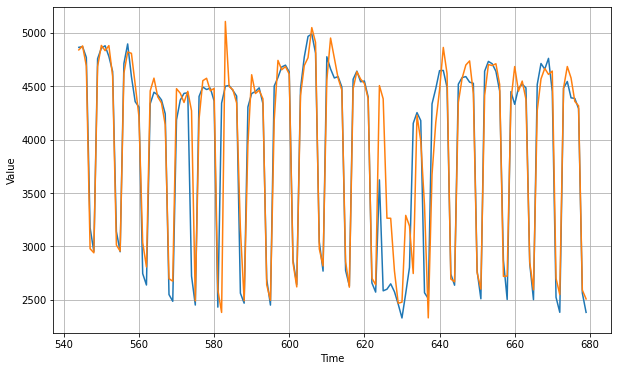

In [21]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, cnn_forecast)

In [22]:
keras.metrics.mean_absolute_error(x_valid, cnn_forecast).numpy()

183.74023

In [23]:
np.mean(x_valid)

3905.8786764705883